# How to modify inputs

In this example, we demonstrate how to modify model inputs after the yaml files have been loaded.

### Import required modules

We begin by importing the necessary modules.

In [1]:
from greenheart.simulation.greenheart_simulation import GreenHeartSimulationConfig
from greenheart.tools.optimization.gc_run_greenheart import run_greenheart

# Just for us to visualize the configuration dictionary in this example
import pprint

/home/cbay/ReferenceHybridSystemDesigns/examples/log/hybrid_systems_2025-03-14T15.06.08.363260.log


### Modify and load inputs

We can modify any part of the configurations in their respective yaml files before they are loaded. For example, if we wanted to modify the electrolyzer CapEx costs, we can modify that value in the H2Integrate config file. First we modify the value `electrolyzer_capex` from the current value of 1295 USD/kW to 1000 USD/kW and save the updated `greenheart_config_onshore_mn_updated.yaml` file:


```
electrolyzer:
  sizing:
    resize_for_enduse: False
    size_for: 'BOL' #'BOL' (generous) or 'EOL' (conservative)
    hydrogen_dmd: 
  rating: 720 # 1160 # 1125.165 # MW 
  cluster_rating_MW: 40
  pem_control_type: 'basic'
  eol_eff_percent_loss: 13 # eol defined as x% change in efficiency from bol
  uptime_hours_until_eol: 77600 # number of 'on' hours until electrolyzer reaches eol
  include_degradation_penalty: True # include degradation
  turndown_ratio: 0.1 # turndown_ratio = minimum_cluster_power/cluster_rating_MW
  electrolyzer_capex: 1000 # $/kW overnight installed capital costs for a 1 MW system in 2022 USD/kW
  replacement_cost_percent: 0.15 # percent of capex - H2A default case
  cost_model: "singlitico2021"
```


Any of the inputs can be updated in the configuration files. We can then load in the configuration files like normal (pointing to our updated yaml file), and setup/run our H2Intergrate simulation.

For more details on what values can be adjusted, please refere to the H2Integrate documentation, specifically the config classes defined for each technology.


Turbine configuration:
turbine_type :  ATB2024_6MW_170RD
hub_height :  115.0
rotor_diameter :  170.0
TSR :  9.0
operation_model :  cosine-loss
turbine_rating :  6
power_thrust_table :  {'ref_air_density': 1.225, 'ref_tilt': 6.0, 'cosine_loss_exponent_yaw': 1.88, 'cosine_loss_exponent_tilt': 1.88, 'wind_speed': [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.5, 11.0, 11.5, 12.0, 12.5, 13.0, 13.5, 14.0, 14.5, 15.0, 15.5, 16.0, 16.5, 17.0, 17.5, 18.0, 18.5, 19.0, 19.5, 20.0, 20.5, 21.0, 21.5, 22.0, 22.5, 23.0, 23.5, 24.0, 24.5, 25.0], 'power': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 228.52969636356403, 376.7496812611624, 580.9895384603997, 822.2288514721866, 1090.2170442095946, 1409.7828977663846, 1805.0803149166634, 2262.4843738118716, 2769.470201641793, 3355.6919968523225, 4026.7774705618813, 4650.06941568721, 5101.383194069271, 5428.709499847277, 5699.338168029099, 5885.580167578582, 5957.320816531514, 5969.721374482352, 5983.7

/home/cbay/anaconda3/envs/refdesign/lib/python3.11/site-packages/openmdao/core/driver.py:769: OpenMDAOWarning:Driver: No matches for pattern '*_df' in recording_options['excludes'].


FLORIS is the system model...

Plotting Wind Resource


Simulating wind farm output in FLORIS...

HOPP Results
Hybrid Annual Energy: {"pv": 1254836132.6456678, "wind": 3258737721.4294705, "battery": -2139814.7804178623, "hybrid": 4511434039.2947235}
Capacity factors: {"pv": 23.277496752844865, "wind": 40.00021752626148, "battery": 0, "hybrid": 31.148462431074197}
Real LCOE from HOPP: {"pv": 6.495237475467832, "wind": 3.400192463459412, "battery": 17.38807145409198, "hybrid": 4.440876847593173}
Took 0.047 sec to run the create clusters
Took 0.039 sec to run even_split_power function
Took 0.453 sec to run the RUN function

Electrolyzer Physics:
H2 Produced Annually (metric tons):  71370.83441687761
Max H2 hourly (metric tons):  13.18425169441212
Max H2 daily (metric tons):  316.3691293480522
Energy to electrolyzer (kWh):  4511313802.768745
Energy per kg (kWh/kg):  59.839464516920735
Max hourly based on est kg/kWh (kg):  26509.75699921389
Max daily rough est (metric tons):  475.5649770424

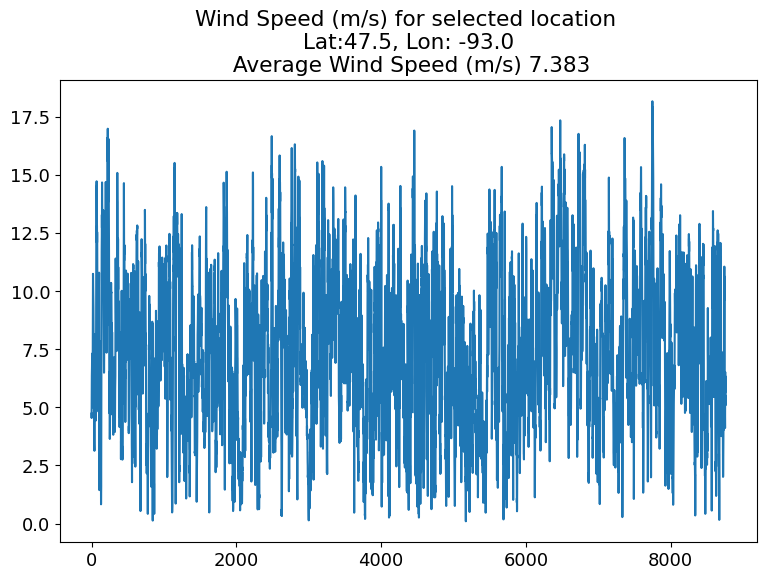

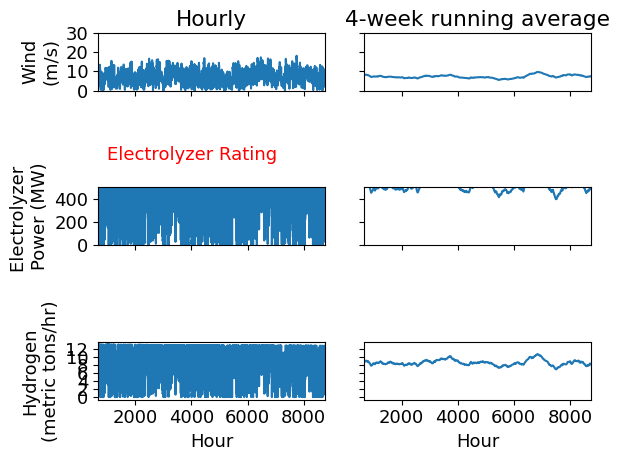

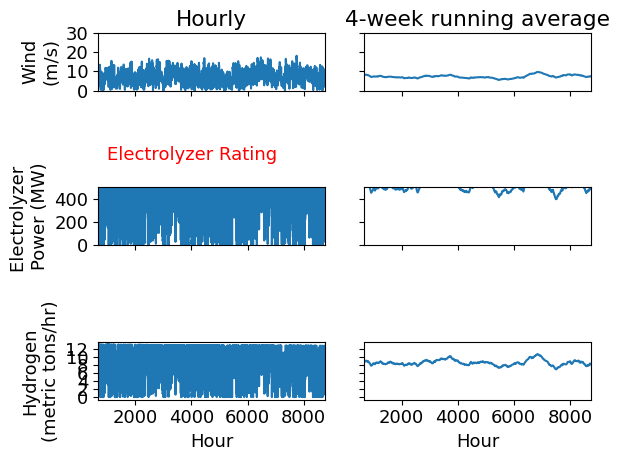

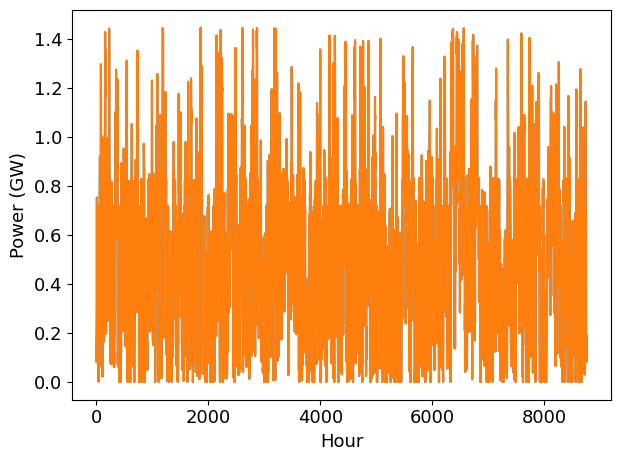

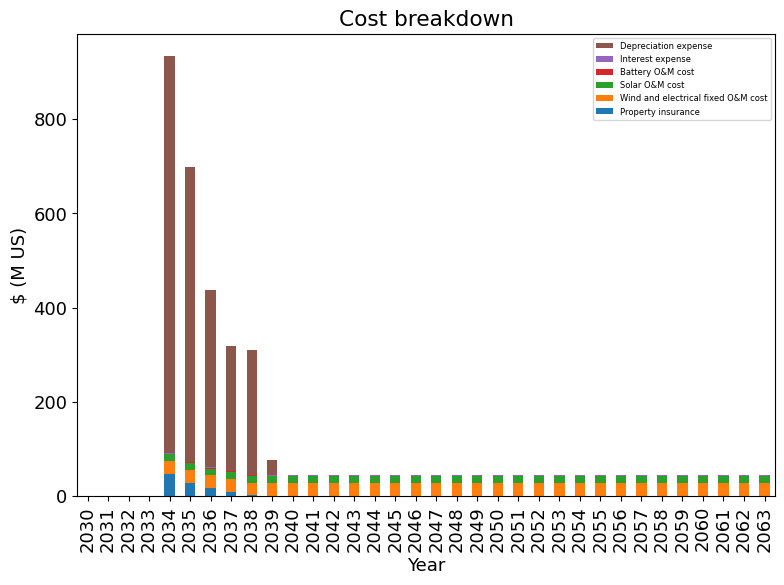

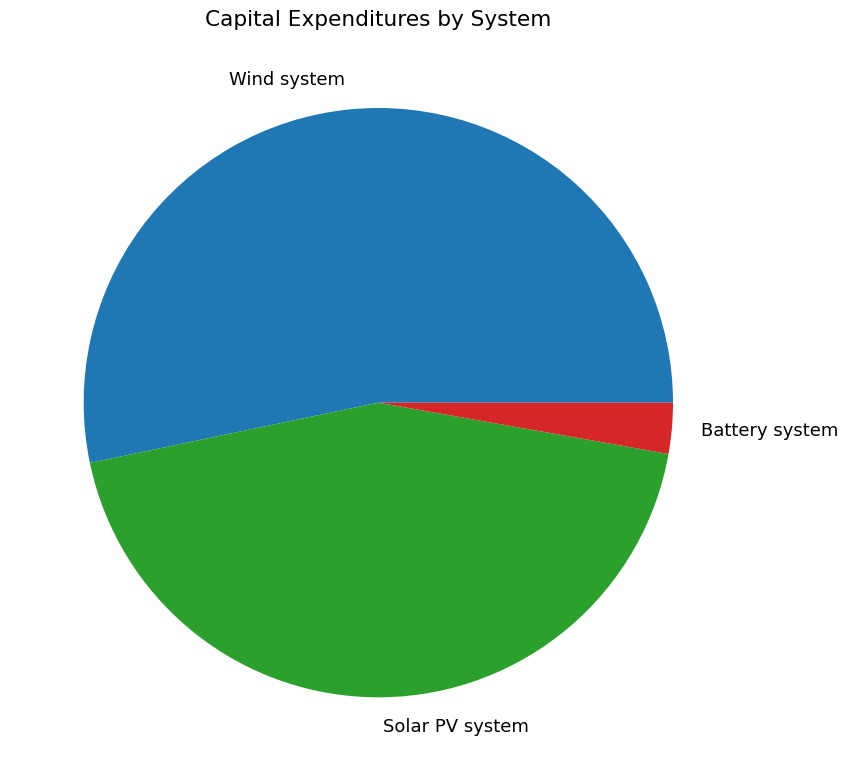

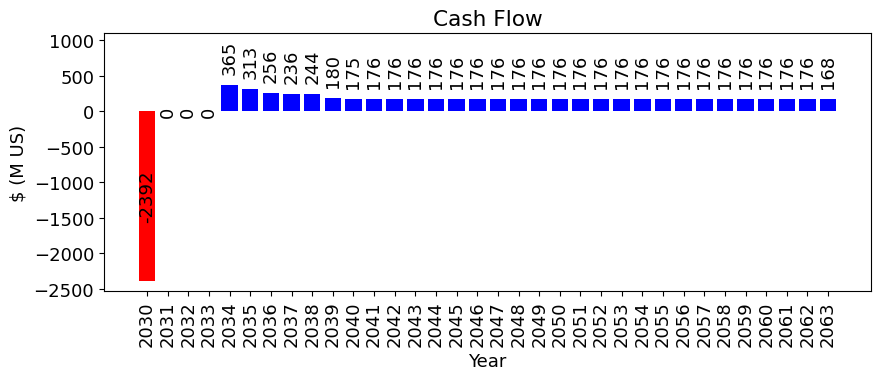

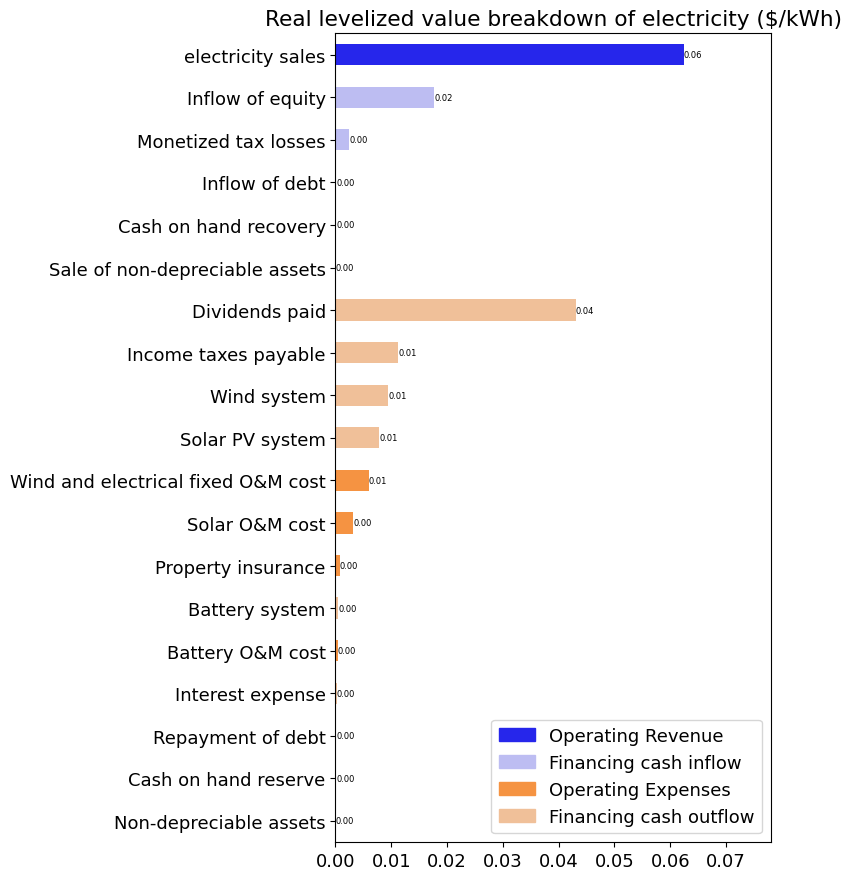

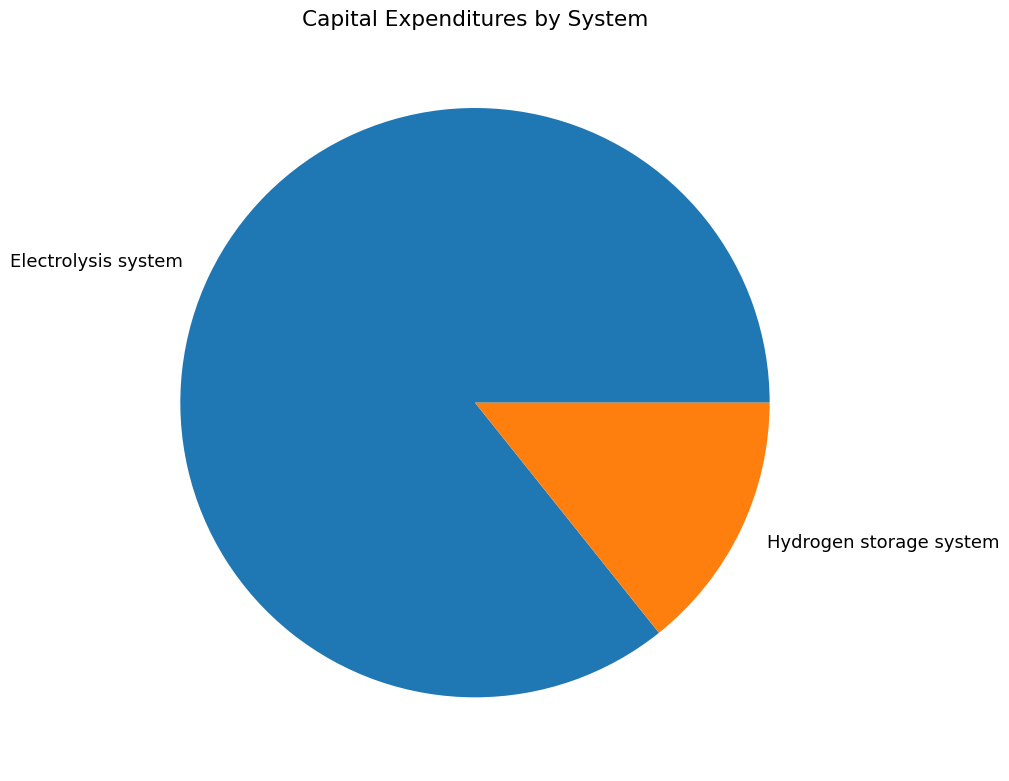

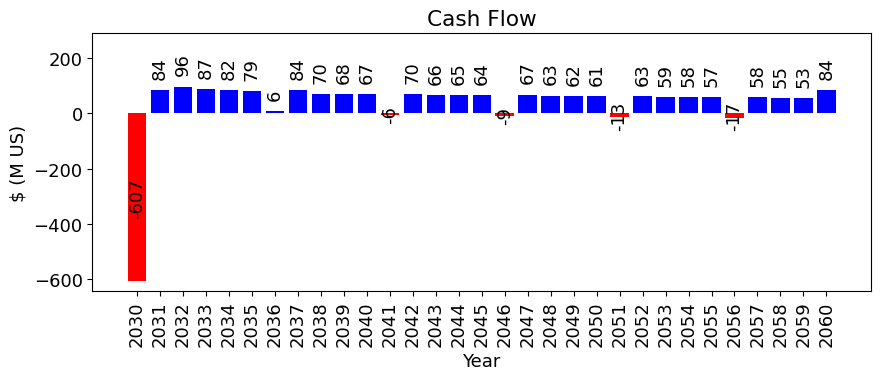

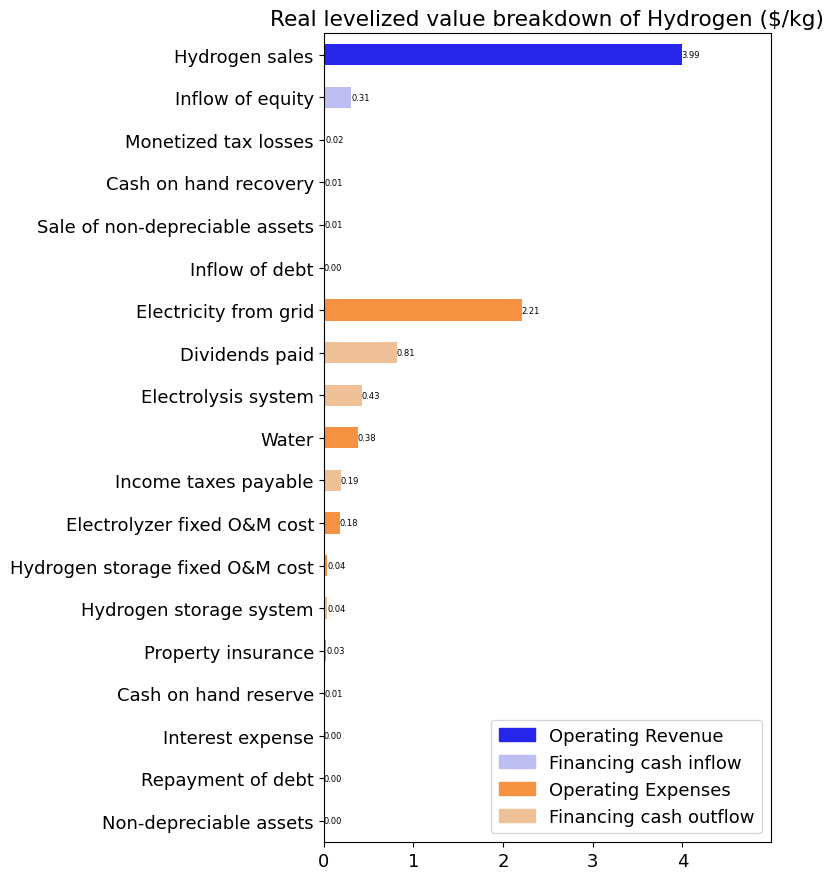

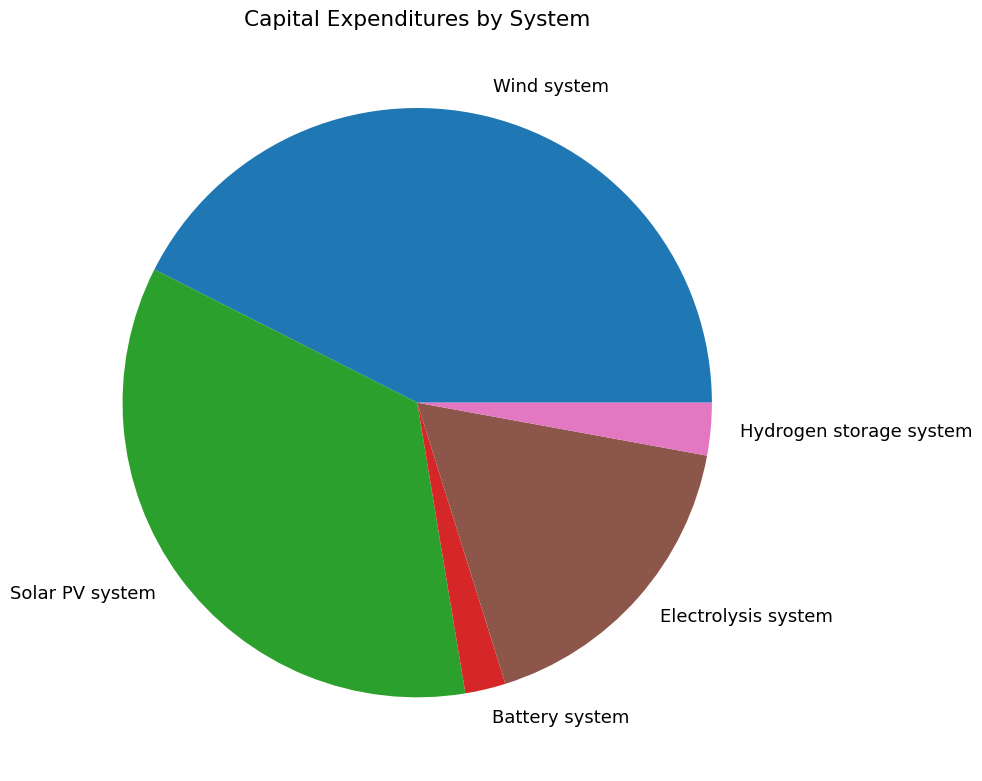

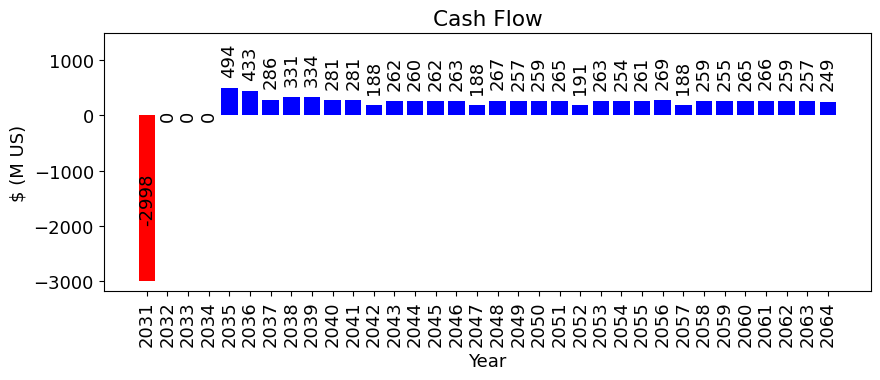

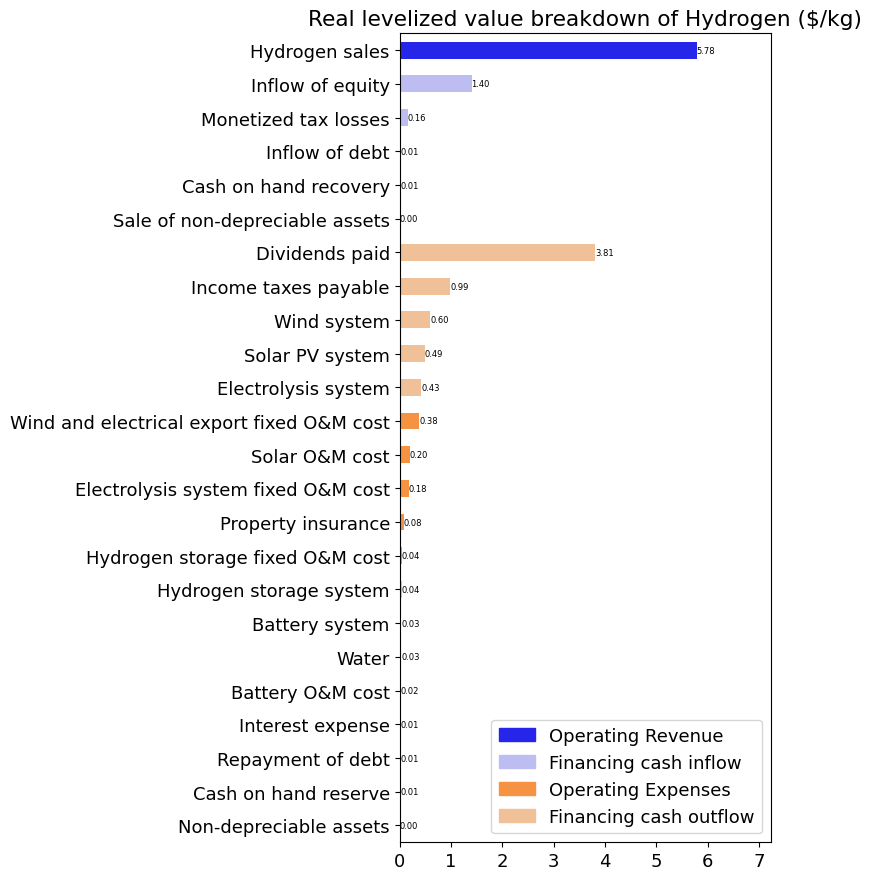

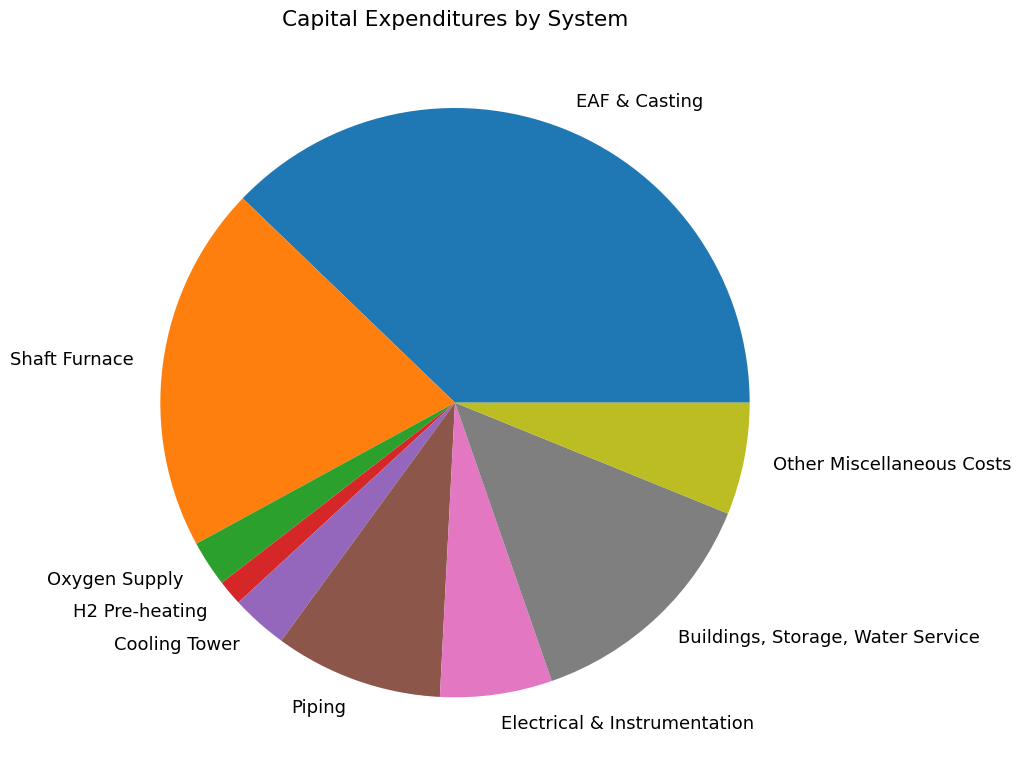

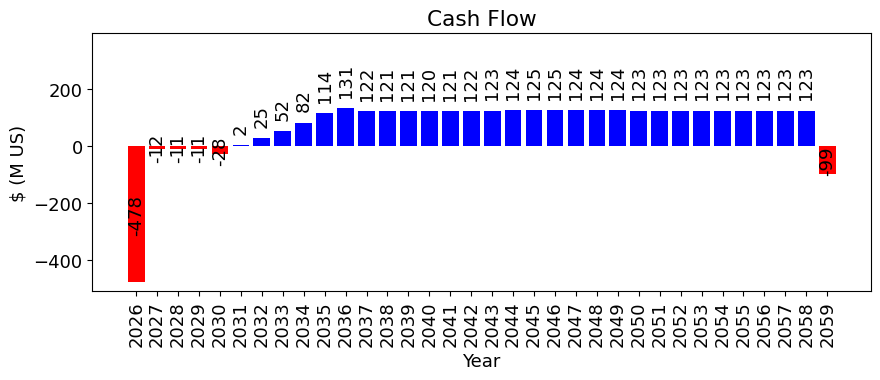

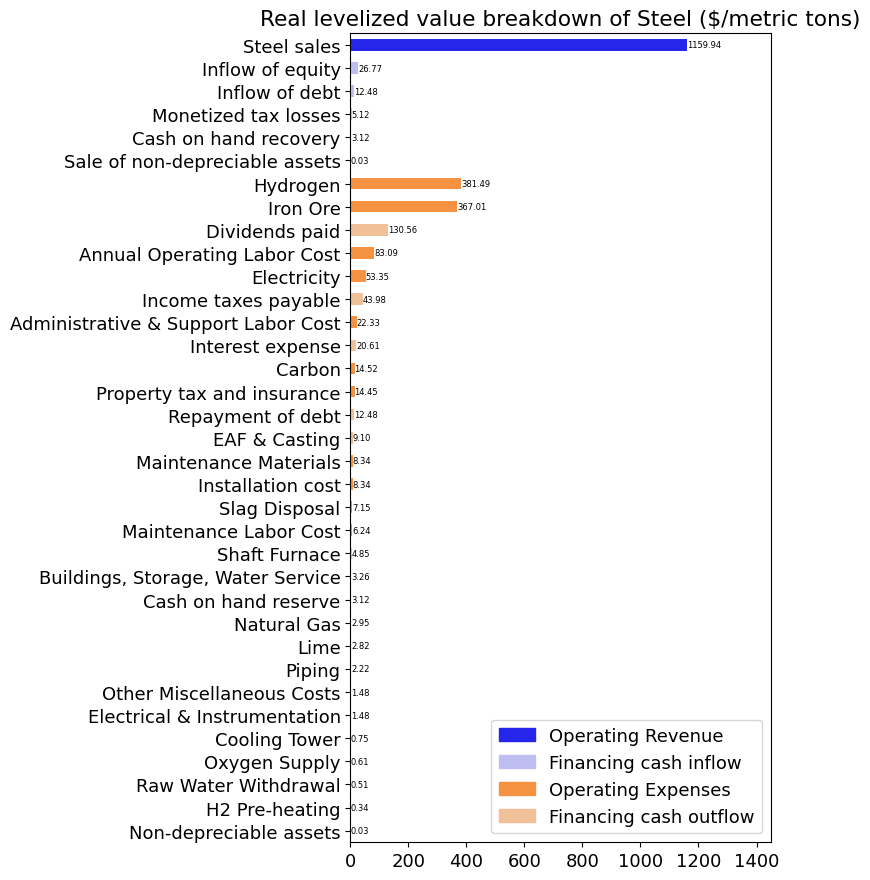

In [3]:
filename_turbine_config = "../reference-systems/01-minnesota-steel/greenHEART/input-files/turbines/ATB2024_6MW_170RD_floris_turbine.yaml"
filename_floris_config = "../reference-systems/01-minnesota-steel/greenHEART/input-files/floris/floris_input_lbw_6MW.yaml"
filename_hopp_config = "../reference-systems/01-minnesota-steel/greenHEART/input-files/plant/hopp_config_mn.yaml"
filename_greenheart_config = "./greenheart_config_onshore_mn_updated.yaml"

config = GreenHeartSimulationConfig(
    filename_hopp_config,
    filename_greenheart_config,
    filename_turbine_config,
    filename_floris_config,
    verbose=True,
    show_plots=False,
    save_plots=True,
    use_profast=True,
    post_processing=True,
    incentive_option=1,
    plant_design_scenario=1,
    output_level=8,
    save_greenheart_output=True,
)

prob, config = run_greenheart(config, run_only=True)